In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("deep_cleaned_muse_with_english_lyrics_only.csv")

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    df["cleaned_lyrics"], df["final_emotion"], 
    test_size=0.2, random_state=42, stratify=df["final_emotion"]
)


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=20000,
    ngram_range=(1,2), 
    min_df=3, 
    max_df=0.6,
    sublinear_tf=True
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [34]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [35]:
model = LinearSVC(class_weight='balanced')

In [36]:
model.fit(X_train_tfidf, y_train)
preds = model.predict(X_test_tfidf)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

       anger       0.18      0.24      0.20       569
        calm       0.17      0.18      0.18      1034
  excitement       0.17      0.16      0.17      1247
        fear       0.08      0.13      0.10       294
         joy       0.21      0.19      0.20      1451
     neutral       0.14      0.15      0.15       952
  reflective       0.18      0.15      0.16      1301
    romantic       0.16      0.22      0.19       734
     sadness       0.24      0.20      0.22      1516

    accuracy                           0.18      9098
   macro avg       0.17      0.18      0.17      9098
weighted avg       0.19      0.18      0.18      9098



              precision    recall  f1-score   support

       anger       0.18      0.24      0.20       569
        calm       0.17      0.18      0.18      1034
  excitement       0.17      0.16      0.17      1247
        fear       0.08      0.13      0.10       294
         joy       0.21      0.19      0.20      1451
     neutral       0.14      0.15      0.15       952
  reflective       0.18      0.15      0.16      1301
    romantic       0.16      0.22      0.19       734
     sadness       0.24      0.20      0.22      1516

    accuracy                           0.18      9098
   macro avg       0.17      0.18      0.17      9098
weighted avg       0.19      0.18      0.18      9098

Confusion Matrix:
 [[136  33  82  30  61  68  59  38  62]
 [ 36 191 121  45 150  87 138 133 133]
 [112 145 200  50 182 129 146 144 139]
 [ 32  29  34  37  23  42  37  17  43]
 [ 82 191 190  55 277 160 159 166 171]
 [121 102 105  50 131 143  95  88 117]
 [104 167 154  65 180 134 194 111 192]
 [ 

<Figure size 1200x800 with 0 Axes>

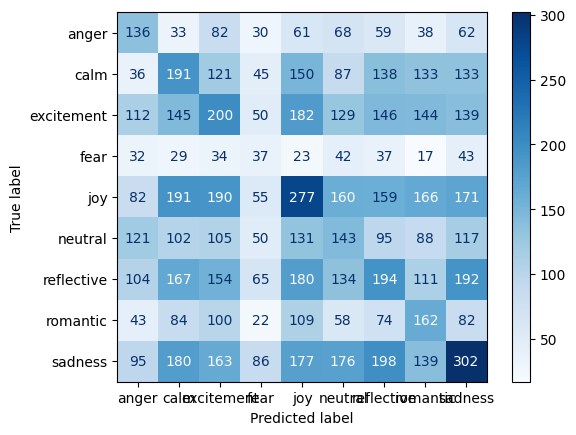

In [37]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(12, 8))  # adjust width x height in inches

# Train model
model.fit(X_train_tfidf, y_train)

# Predict
preds = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, preds))

# Confusion matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)
# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')


In [39]:
# tfidf.fit(cleaned_lyrics)
print(tfidf.get_feature_names_out()[:50])


['aaaah' 'aaah' 'aahh' 'abandon' 'abandoned' 'abc' 'abide' 'ability'
 'ablaze' 'able' 'aboard' 'absence' 'absolute' 'absolutely' 'abstract'
 'absurd' 'abuse' 'abused' 'abyss' 'accent' 'accept' 'accepted' 'access'
 'accident' 'accidental' 'accidentally' 'according' 'account' 'accused'
 'ace' 'ache' 'achieve' 'aching' 'acid' 'acre' 'across' 'across face'
 'across floor' 'across land' 'across ocean' 'across room' 'across sea'
 'across sky' 'across street' 'across water' 'across world' 'act'
 'act fool' 'act like' 'acted']
